### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
sns.set_theme(style="whitegrid")
palette = ["#3A0CA3", "#4361EE", "#4CC9F0"]

### Read dataset

In [2]:
df = pd.read_csv("data/dataset.csv", usecols=lambda x: x != "Unnamed: 0")
df.head(5)

,offer_id,category_id,add_to_wishlist,add_to_cart,base_price_with_vat,ordered_quantity,orders,product_novelty,count_reviews,pageviews,rating,promo_price_with_vat,date
0,1,1,0,0,1554.67,0,0,2012-12-07,5,54,4.80,1554.67,20201229
1,1,1,0,0,1554.67,0,0,2012-12-07,5,87,4.80,1299.99,20201230
2,1,1,0,0,1554.67,0,0,2012-12-07,5,42,4.80,1554.67,20201228
3,1,1,0,0,1554.67,0,0,2012-12-07,5,25,4.80,1554.67,20201227
4,1,1,0,0,1554.67,0,0,2012-12-07,5,23,4.80,1554.67,20201226


### Basic inspection

In [3]:
shape = df.shape
print(f"Number of rows: {shape[0]}")
print(f"Number of columns: {shape[1]}")

Number of rows: 488468
Number of columns: 13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488468 entries, 0 to 488467
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   offer_id              488468 non-null  int64  
 1   category_id           488468 non-null  int64  
 2   add_to_wishlist       488468 non-null  int64  
 3   add_to_cart           488468 non-null  int64  
 4   base_price_with_vat   488468 non-null  float64
 5   ordered_quantity      488468 non-null  int64  
 6   orders                488468 non-null  int64  
 7   product_novelty       488468 non-null  object 
 8   count_reviews         488468 non-null  int64  
 9   pageviews             488468 non-null  int64  
 10  rating                488468 non-null  float64
 11  promo_price_with_vat  488468 non-null  float64
 12  date                  488468 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 48.4+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
offer_id,488468.00,12608.88,7695.18,1.00,5208.00,14026.00,19500.00,25693.00
category_id,488468.00,1.86,0.67,1.00,1.00,2.00,2.00,3.00
add_to_wishlist,488468.00,0.74,6.80,0.00,0.00,0.00,0.00,1650.00
add_to_cart,488468.00,0.68,6.14,0.00,0.00,0.00,0.00,1478.00
base_price_with_vat,488468.00,3278.29,5218.81,-89.29,879.99,2019.99,4069.90,395326.33
ordered_quantity,488468.00,0.25,3.61,-1.00,0.00,0.00,0.00,1038.00
orders,488468.00,0.24,3.51,0.00,0.00,0.00,0.00,1029.00
count_reviews,488468.00,1.56,13.78,0.00,0.00,0.00,0.00,918.00
pageviews,488468.00,58.81,476.46,0.00,0.00,0.00,9.00,142671.00
rating,488468.00,0.68,1.61,0.00,0.00,0.00,0.00,6.00


Alright, based on this quick inspection, we can draw a quick conclusion:
- The 'date' column should be converted to an actual date format: date.

In [6]:
# Convert date from int to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df['product_novelty'] = pd.to_datetime(df['product_novelty'])

# Sort the dataframe by date, category_id and offer_id
df = df.sort_values(['date', 'category_id', 'offer_id'], ascending=True).reset_index(drop=True)

In [7]:
# Check for NaN's in our dataset
df_nan = df[df.isnull().any(axis=1)]
print(f"Rows containing NaN's: {df_nan.shape[0]}")

Rows containing NaN's: 0


No NaN's registered.

### Let's start displaying some charts to get some insights about our dataset

In [8]:
# Grouping by 'date' and 'category_id' and calculating the mean of 'pageviews', 'ordered_quantity' and 'promo_price_with_vat'
category_trends = df.groupby(['date', 'category_id']).agg({'pageviews': 'mean', 'ordered_quantity': 'mean', 'base_price_with_vat': 'mean', 'promo_price_with_vat': 'mean'}).reset_index()
# Let's actually multiply the ordered quantity with 100
category_trends['ordered_quantity'] = (category_trends['ordered_quantity']  * 100).astype(int)
category_trends['higher_promo_price'] = np.where(category_trends['promo_price_with_vat'] > category_trends['base_price_with_vat'], 'yes', 'no')
category_trends['discount'] = category_trends['base_price_with_vat'] - category_trends['promo_price_with_vat']

In [9]:
category_trends['higher_promo_price'].value_counts()

no    93
Name: higher_promo_price, dtype: int64

Just wanted to check if the promo price got higher than the base price during this period.

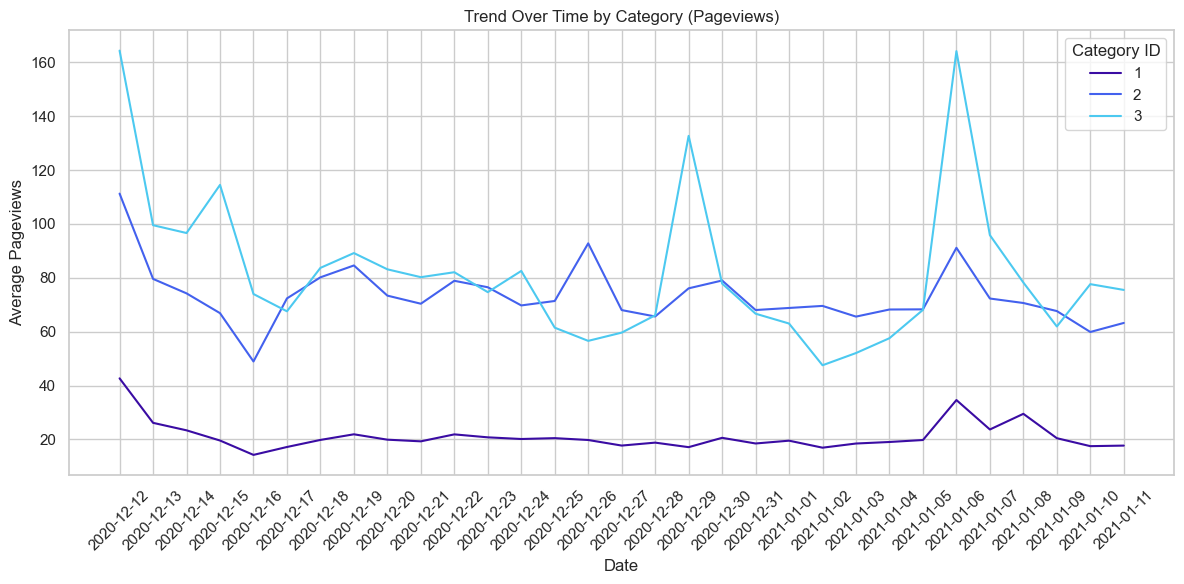

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends, x='date', y='pageviews', hue='category_id', palette=palette)
plt.title('Trend Over Time by Category (Pageviews)')
plt.xlabel('Date')
plt.ylabel('Average Pageviews')
plt.legend(title='Category ID', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- In the charts provided, it is evident that for this sample, the apex of pageviews across all three categories occurs on December 12th. This surge is likely attributable to consumers seeking gifts during the festive season, coupled with the possibility of ongoing Black Friday promotions in Romania. 
- Additionally, we observe sporadic spikes in the period between Christmas and the New Year. This trend may be due to customers returning gifts that weren't suitable and searching for replacement products. 
- Lastly, the uptick in pageviews following the New Year can be readily explained by the onset of the discount season, which typically entices an increase in shopping activity.

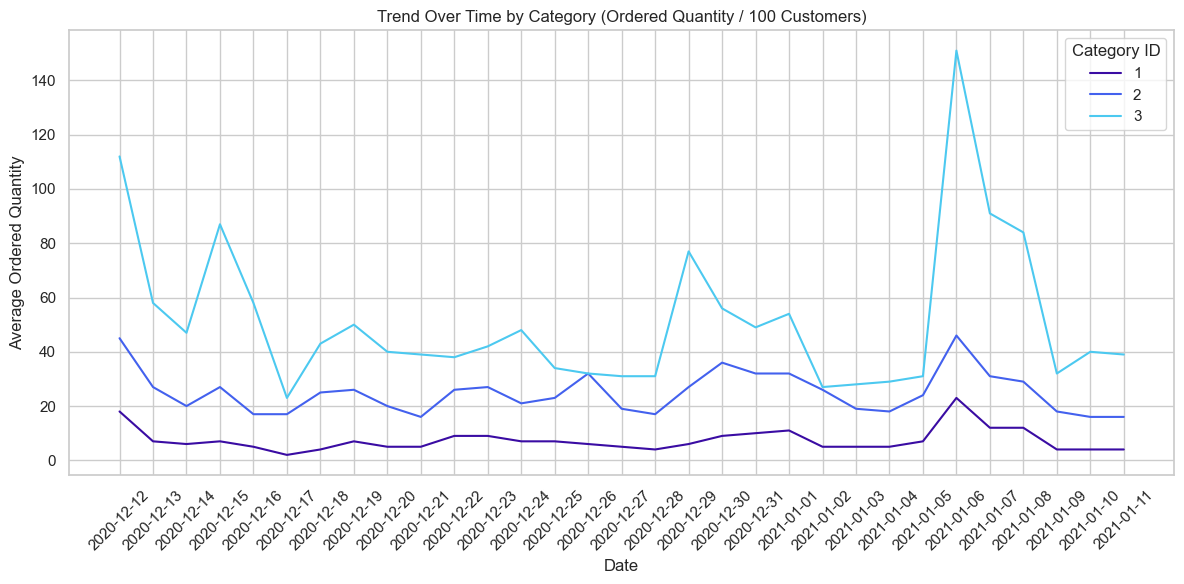

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends, x='date', y='ordered_quantity', hue='category_id', palette=palette)
plt.title('Trend Over Time by Category (Ordered Quantity / 100 Customers)')
plt.xlabel('Date')
plt.ylabel('Average Ordered Quantity')
plt.legend(title='Category ID', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This line chart illustrates the trend over time for the average ordered quantity per 100 customers, categorized by three distinct product categories (as indicated by Category ID 1, 2, and 3).
- Window Shopping vs. Purchasing Behavior: While the previous chart indicated 'window shopping' behavior with pageviews, this chart provides insights into actual purchasing behavior. It appears that, initially, customers were browsing or 'window shopping' at a consistent rate across all categories, as indicated by the pageviews. 
- However, this chart shows a clear preference for placing orders in certain categories post-New Year, suggesting that window shopping has translated into purchases, possibly driven by post-holiday discounts.

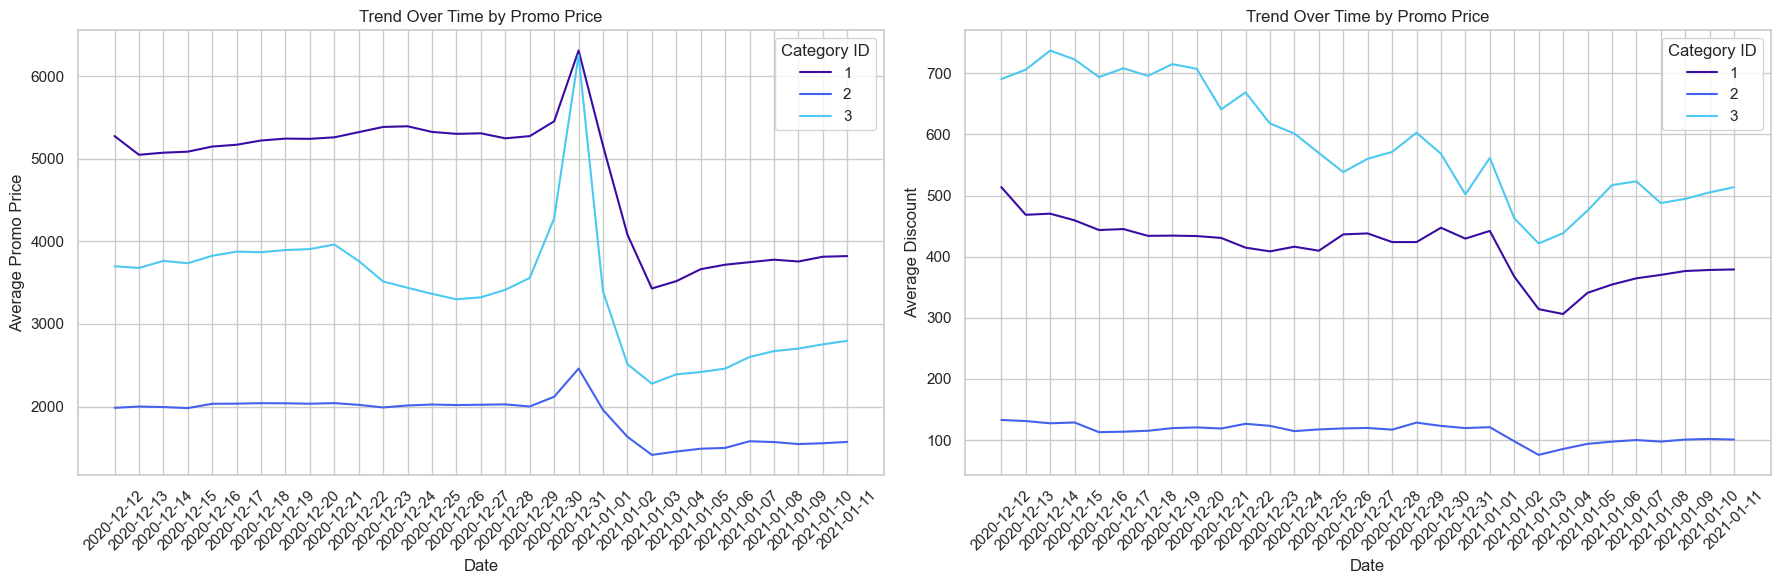

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(data=category_trends, x='date', y='promo_price_with_vat', hue='category_id', palette=palette, ax=axs[0])
axs[0].set_title('Trend Over Time by Promo Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Average Promo Price')
axs[0].legend(title='Category ID', loc='upper right')
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=category_trends, x='date', y='discount', hue='category_id', palette=palette, ax=axs[1])
axs[1].set_title('Trend Over Time by Promo Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Average Discount')
axs[1].legend(title='Category ID', loc='upper right')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- After December 30th, there's a significant drop in promo prices, especially in Category 2, indicating higher sales post-New Year due to post-holiday discounts clearing inventory.
- Category 1 consistently has the highest promo prices, possibly leading to lower sales, as price plays a crucial role in buying decisions.
- This suggests that aggressive post-holiday pricing boosts sales, especially in categories with substantial price cuts.

Let's see what products got the highest amount of reviews.

In [13]:
df_max_reviews = df.loc[df.groupby(['category_id'])['count_reviews'].idxmax()][['category_id', 'offer_id', 'count_reviews', 'base_price_with_vat', 'promo_price_with_vat', 'rating']].reset_index(drop=True)
df_max_reviews

,category_id,offer_id,count_reviews,base_price_with_vat,promo_price_with_vat,rating
0,1,4788,44,5799.99,4499.99,4.55
1,2,286,654,1099.99,999.99,4.39
2,3,58,918,799.99,799.99,4.34


- As the base price of the product increases, the number of reviews tends to decrease. 
- This is a reasonable expectation, as more expensive products may attract fewer customers and thus receive fewer reviews compared to lower-priced products.

<br/><br/>

Let's calculate the *conversion rate* grouping by each day and category_id.
- Formula: conversion rate = (orders/total visitors) * 100

In [14]:
df_conversion_rates = df.groupby(['date', 'category_id']).agg({'pageviews': 'sum', 'orders': 'sum'})
df_conversion_rates['conversion_rate'] = (df_conversion_rates['orders'] / df_conversion_rates['pageviews']) * 100
df_conversion_rates['conversion_rate'] = df_conversion_rates['conversion_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

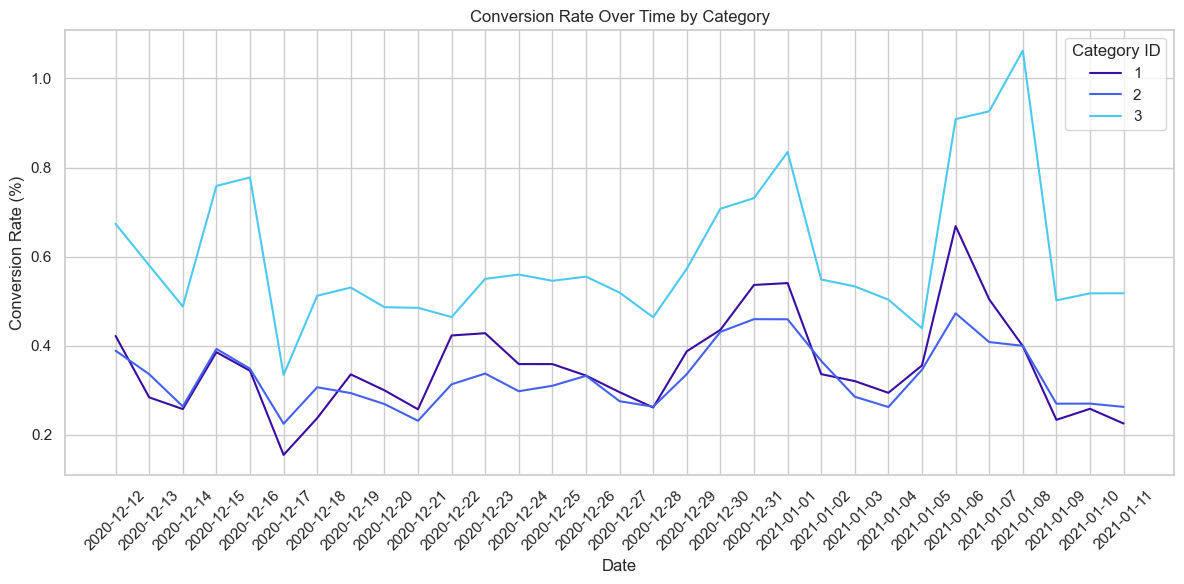

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_conversion_rates, x='date', y='conversion_rate', hue='category_id', palette=palette)
plt.title('Conversion Rate Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend(title='Category ID', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Category 3 peaks sharply, suggesting a successful promotion or high demand period.
- Category 1 remains consistent, indicating stable demand or effective pricing.
- Category 2 fluctuates but stays in the middle range, showing moderate variability in conversion.

<br/><br/>

*Pearson's correlation* coefficient for numerical features.

In [16]:
# Manual feature extraction because we might have some categorical features which are numerically converted
numerical_features = [
    'add_to_wishlist', 'add_to_cart', 'base_price_with_vat', 'ordered_quantity', 
    'orders', 'product_novelty', 'count_reviews', 'pageviews', 'rating', 'promo_price_with_vat'
]

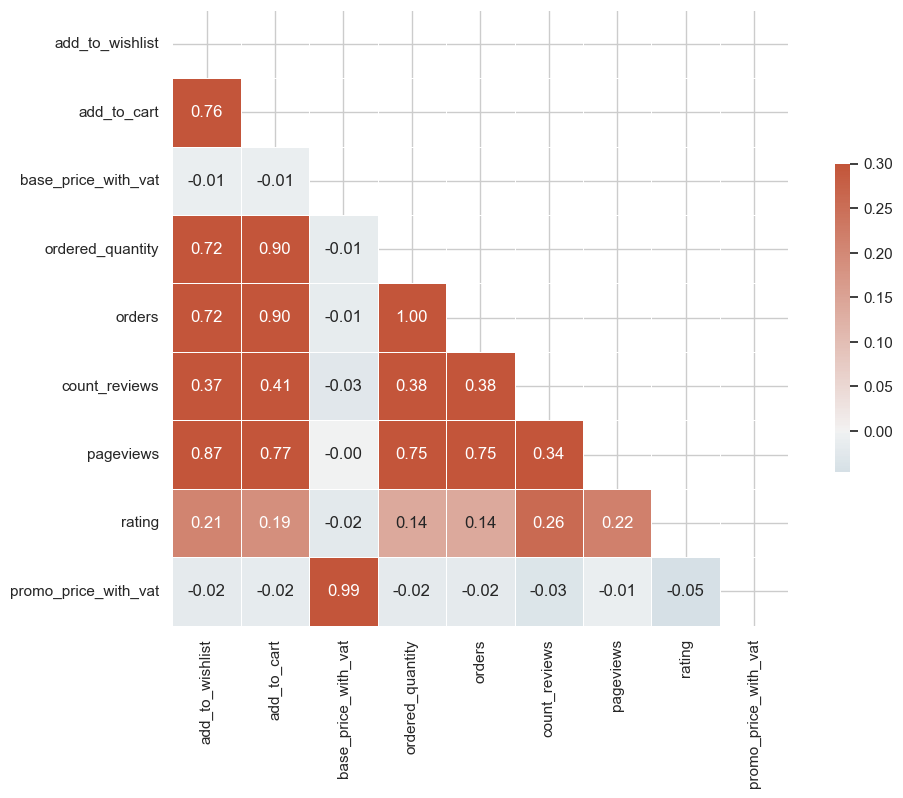

In [17]:
correlation_matrix = df[numerical_features].corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.show()

- High Correlation Between *Pageviews* and *Add-to-Cart/Wishlist*: This suggests that as more people view products, the number of these actions increases, indicating effective product visibility.
- Moderate Correlation Between *Reviews* and *Conversion Activities*: There is a moderate positive correlation between count_reviews and both add_to_cart and add_to_wishlist activities. Products with more reviews may appear more trustworthy, thus encouraging more shoppers to consider purchasing them.
- Lower Correlation Between *Prices* and *Conversion Activities*: The base_price_with_vat and promo_price_with_vat have a very low, almost negligible correlation with conversion-related actions.

We can see that some of our variables show signs of multicollinearity, but since I do not expect to use a linear machine learning model, I will not address this phenomenon.

If we had any categorical features, we would calculate the correlation using Spearman's rank correlation coefficient for ordinal data and the Chi-Square test for nominal data.

<br/><br/>

In [18]:
df['date'] = pd.to_datetime(df['date'])

# Group by offer_id and calculate the difference between the max and min dates
offer_days = df.groupby('offer_id')['date'].max() - df.groupby('offer_id')['date'].min()
offer_days = offer_days.reset_index()
offer_days['days'] = offer_days['date'].dt.days
offer_days = offer_days.groupby(['days'])['offer_id'].count().reset_index()

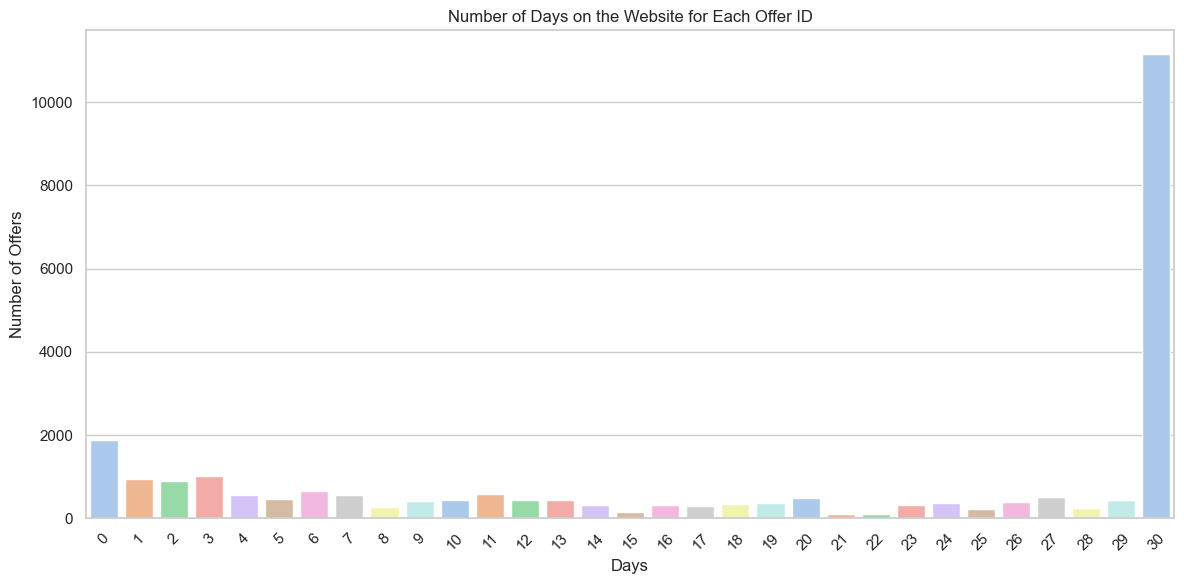

In [19]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(x='days', y='offer_id', data=offer_days, palette="pastel")
plt.title('Number of Days on the Website for Each Offer ID')
plt.xlabel('Days')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We'll need to pay attention when computing lag and rolling window variables since not all the *offer_ids* have the same time of publication on the e-commerce website.

### Export dataframe

In [20]:
df.to_csv('data/dataset_v1.csv', index=False)